<a href="https://colab.research.google.com/github/Mahesh-Bandi/document-classification/blob/master/Scanned-Document-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
uploaded=files.upload()

Saving training.zip to training.zip


In [0]:
import os
import zipfile

local_zip = '/content/training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [15]:
uploaded=files.upload()


Saving validation.zip to validation.zip


In [0]:
import os
import zipfile

local_zip = '/content/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
documents_dir = os.path.join('/tmp/training/documents')
images_dir = os.path.join('/tmp/training/images')

print('total training rock images:', len(os.listdir(documents_dir)))
print('total training scissors images:', len(os.listdir(images_dir)))

document_files = os.listdir(documents_dir)
print(document_files[:10])

image_files = os.listdir(images_dir)
print(image_files[:10])

total training rock images: 54
total training scissors images: 50
['pan13.jpg', 'Aadhar12.jpg', 'DL20.jpg', 'DL12.jpg', 'DL34.jpg', 'Voter-ID10.jpg', 'pan4.jpg', 'Voter-ID7.jpg', 'DL9.jpg', 'DL1.jpg']
['image39.png', 'image35.jpg', 'img6.jpg', 'img18.jpg', 'img2.jpg', 'image32.jpg', 'img11.jpg', 'image40.png', 'image1.jpg', 'img7.jpg']


In [17]:
val_documents_dir = os.path.join('/tmp/validation/documents')
val_images_dir = os.path.join('/tmp/validation/images')

print('total training rock images:', len(os.listdir(val_documents_dir)))
print('total training scissors images:', len(os.listdir(val_images_dir)))

val_document_files = os.listdir(val_documents_dir)
print(val_document_files[:10])

val_image_files = os.listdir(val_images_dir)
print(val_image_files[:10])

total training rock images: 20
total training scissors images: 20
['document013.jpg', 'document001.jpg', 'document020.jpg', 'document004.jpg', 'document006.jpg', 'document003.jpg', 'document011.jpg', 'document007.jpg', 'document005.jpg', 'document009.jpg']
['image45.png', 'image009.jpg', 'image43.png', 'image002.jpg', 'image004.jpg', 'image005.jpg', 'image010.jpg', 'image52.jpg', 'image007.jpg', 'image47.png']


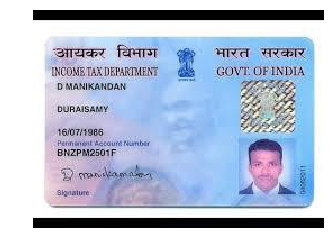

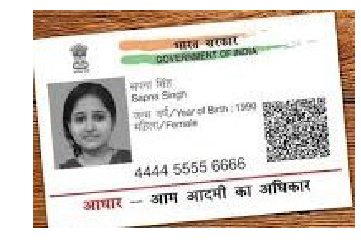

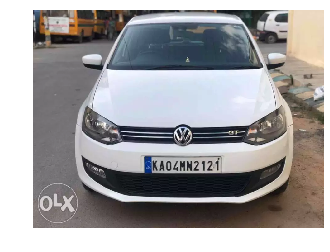

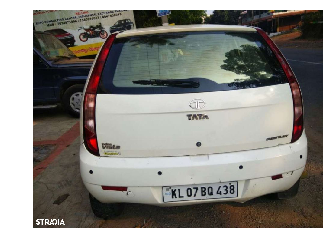

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_document = [os.path.join(documents_dir, fname) 
                for fname in document_files[pic_index-2:pic_index]]
next_image = [os.path.join(images_dir, fname) 
                for fname in image_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_document+next_image):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [19]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='binary'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()


Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [20]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
4/4 [==============================] - 2s 498ms/step - loss: 2.6764 - acc: 0.4904 - val_loss: 0.6572 - val_acc: 0.5000
Epoch 2/25
4/4 [==============================] - 1s 254ms/step - loss: 0.7199 - acc: 0.4808 - val_loss: 0.6282 - val_acc: 0.5000
Epoch 3/25
4/4 [==============================] - 1s 266ms/step - loss: 0.5023 - acc: 0.6923 - val_loss: 0.2582 - val_acc: 0.9500
Epoch 4/25
4/4 [==============================] - 1s 280ms/step - loss: 3.0092 - acc: 0.6635 - val_loss: 0.5660 - val_acc: 0.6750
Epoch 5/25
4/4 [==============================] - 1s 253ms/step - loss: 0.5243 - acc: 0.7019 - val_loss: 0.3898 - val_acc: 0.8750
Epoch 6/25
4/4 [==============================] - 1s 276ms/step - loss: 0.5991 - acc: 0.6923 - val_loss: 0.4932 - val_acc: 0.7250
Epoch 7/25
4/4 [==============================] - 1s 268ms/step - loss: 0.4935 - acc: 0.7308 - val_loss: 0.3296 - val_acc: 0.8750
Epoch 8/25
4/4 [==============================] - 1s 271ms/step - loss: 0.4869 - acc: 0.77

/tmp/training/images/image30.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


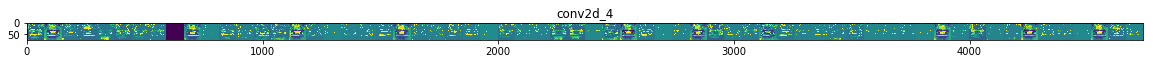

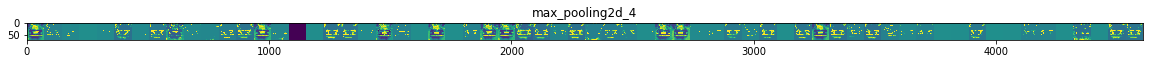

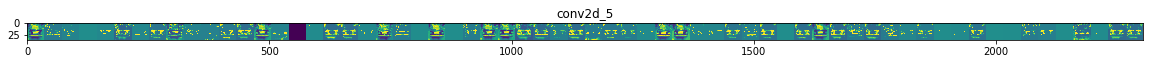

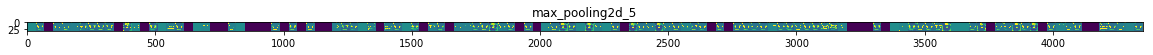

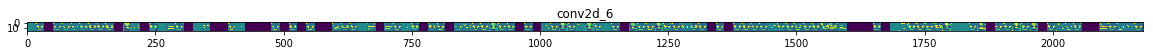

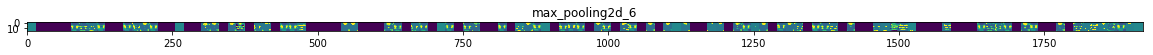

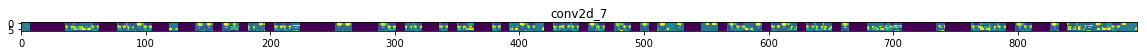

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
documents = [os.path.join(documents_dir, f) for f in document_files]
images = [os.path.join(images_dir, f) for f in image_files]
img_path = random.choice(images)
print(img_path)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Document")
  else:
    print(fn + " is a image")

Saving Adhar2.jpeg to Adhar2 (1).jpeg
Saving Adhar8.png to Adhar8 (1).png
Saving image47.png to image47.png
Saving image50.png to image50.png
[0.]
Adhar2.jpeg is a image
[0.]
Adhar8.png is a image
[0.]
image47.png is a image
[0.]
image50.png is a image


In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Document")
  else:
    print(fn + " is a image")

Saving image46.png to image46.png
Saving image47.png to image47.png
Saving image50.png to image50.png
Saving image52.jpg to image52.jpg
Saving image55.png to image55.png
Saving image59.jpg to image59.jpg
Saving xray1.jfif to xray1.jfif
Saving xray2.jfif to xray2.jfif
Saving xray3.jfif to xray3.jfif
Saving xray4.jfif to xray4.jfif
Saving xray5.jfif to xray5.jfif
[1.]
image46.png is a Document
[1.]
image47.png is a Document
[1.]
image50.png is a Document
[1.]
image52.jpg is a Document
[1.]
image55.png is a Document
[1.]
image59.jpg is a Document
[1.]
xray1.jfif is a Document
[1.]
xray2.jfif is a Document
[1.]
xray3.jfif is a Document
[1.]
xray4.jfif is a Document
[1.]
xray5.jfif is a Document


In [0]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

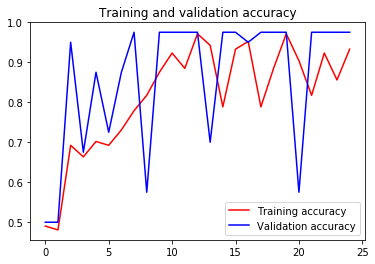

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()